In [ ]:
import pandas as pd
import numpy as np
column_name=["s1","c1","s2","c2","s3","c3","s4","c4","s5","c5","CLASS"]
data = pd.read_csv("poker-hand-testing.csv",names=column_name)
data.head()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [ ]:
data.describe()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,CLASS
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [ ]:
data.shape

(1000000, 11)

In [ ]:
x = data.drop(columns=['CLASS'])
y=data['CLASS']

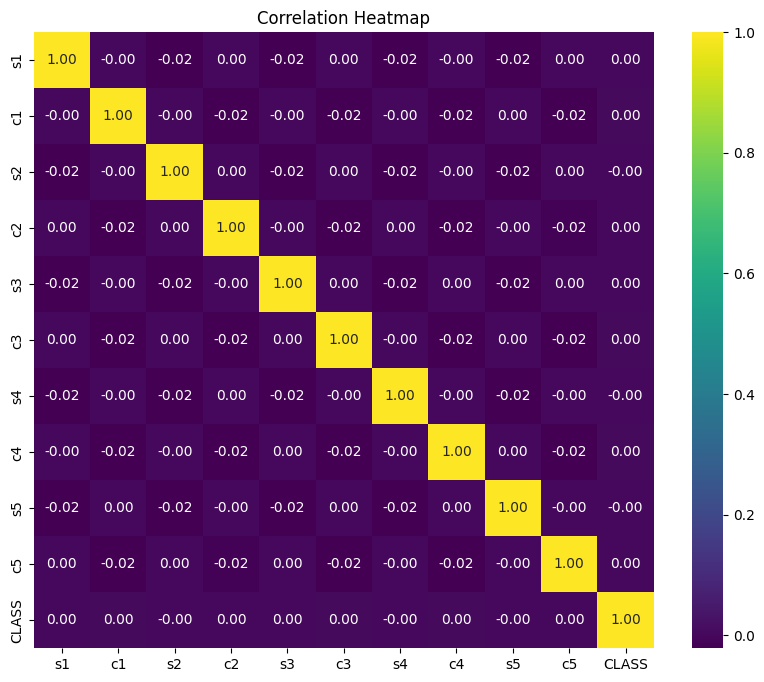

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_df is your DataFrame containing the data

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1200x800 with 0 Axes>

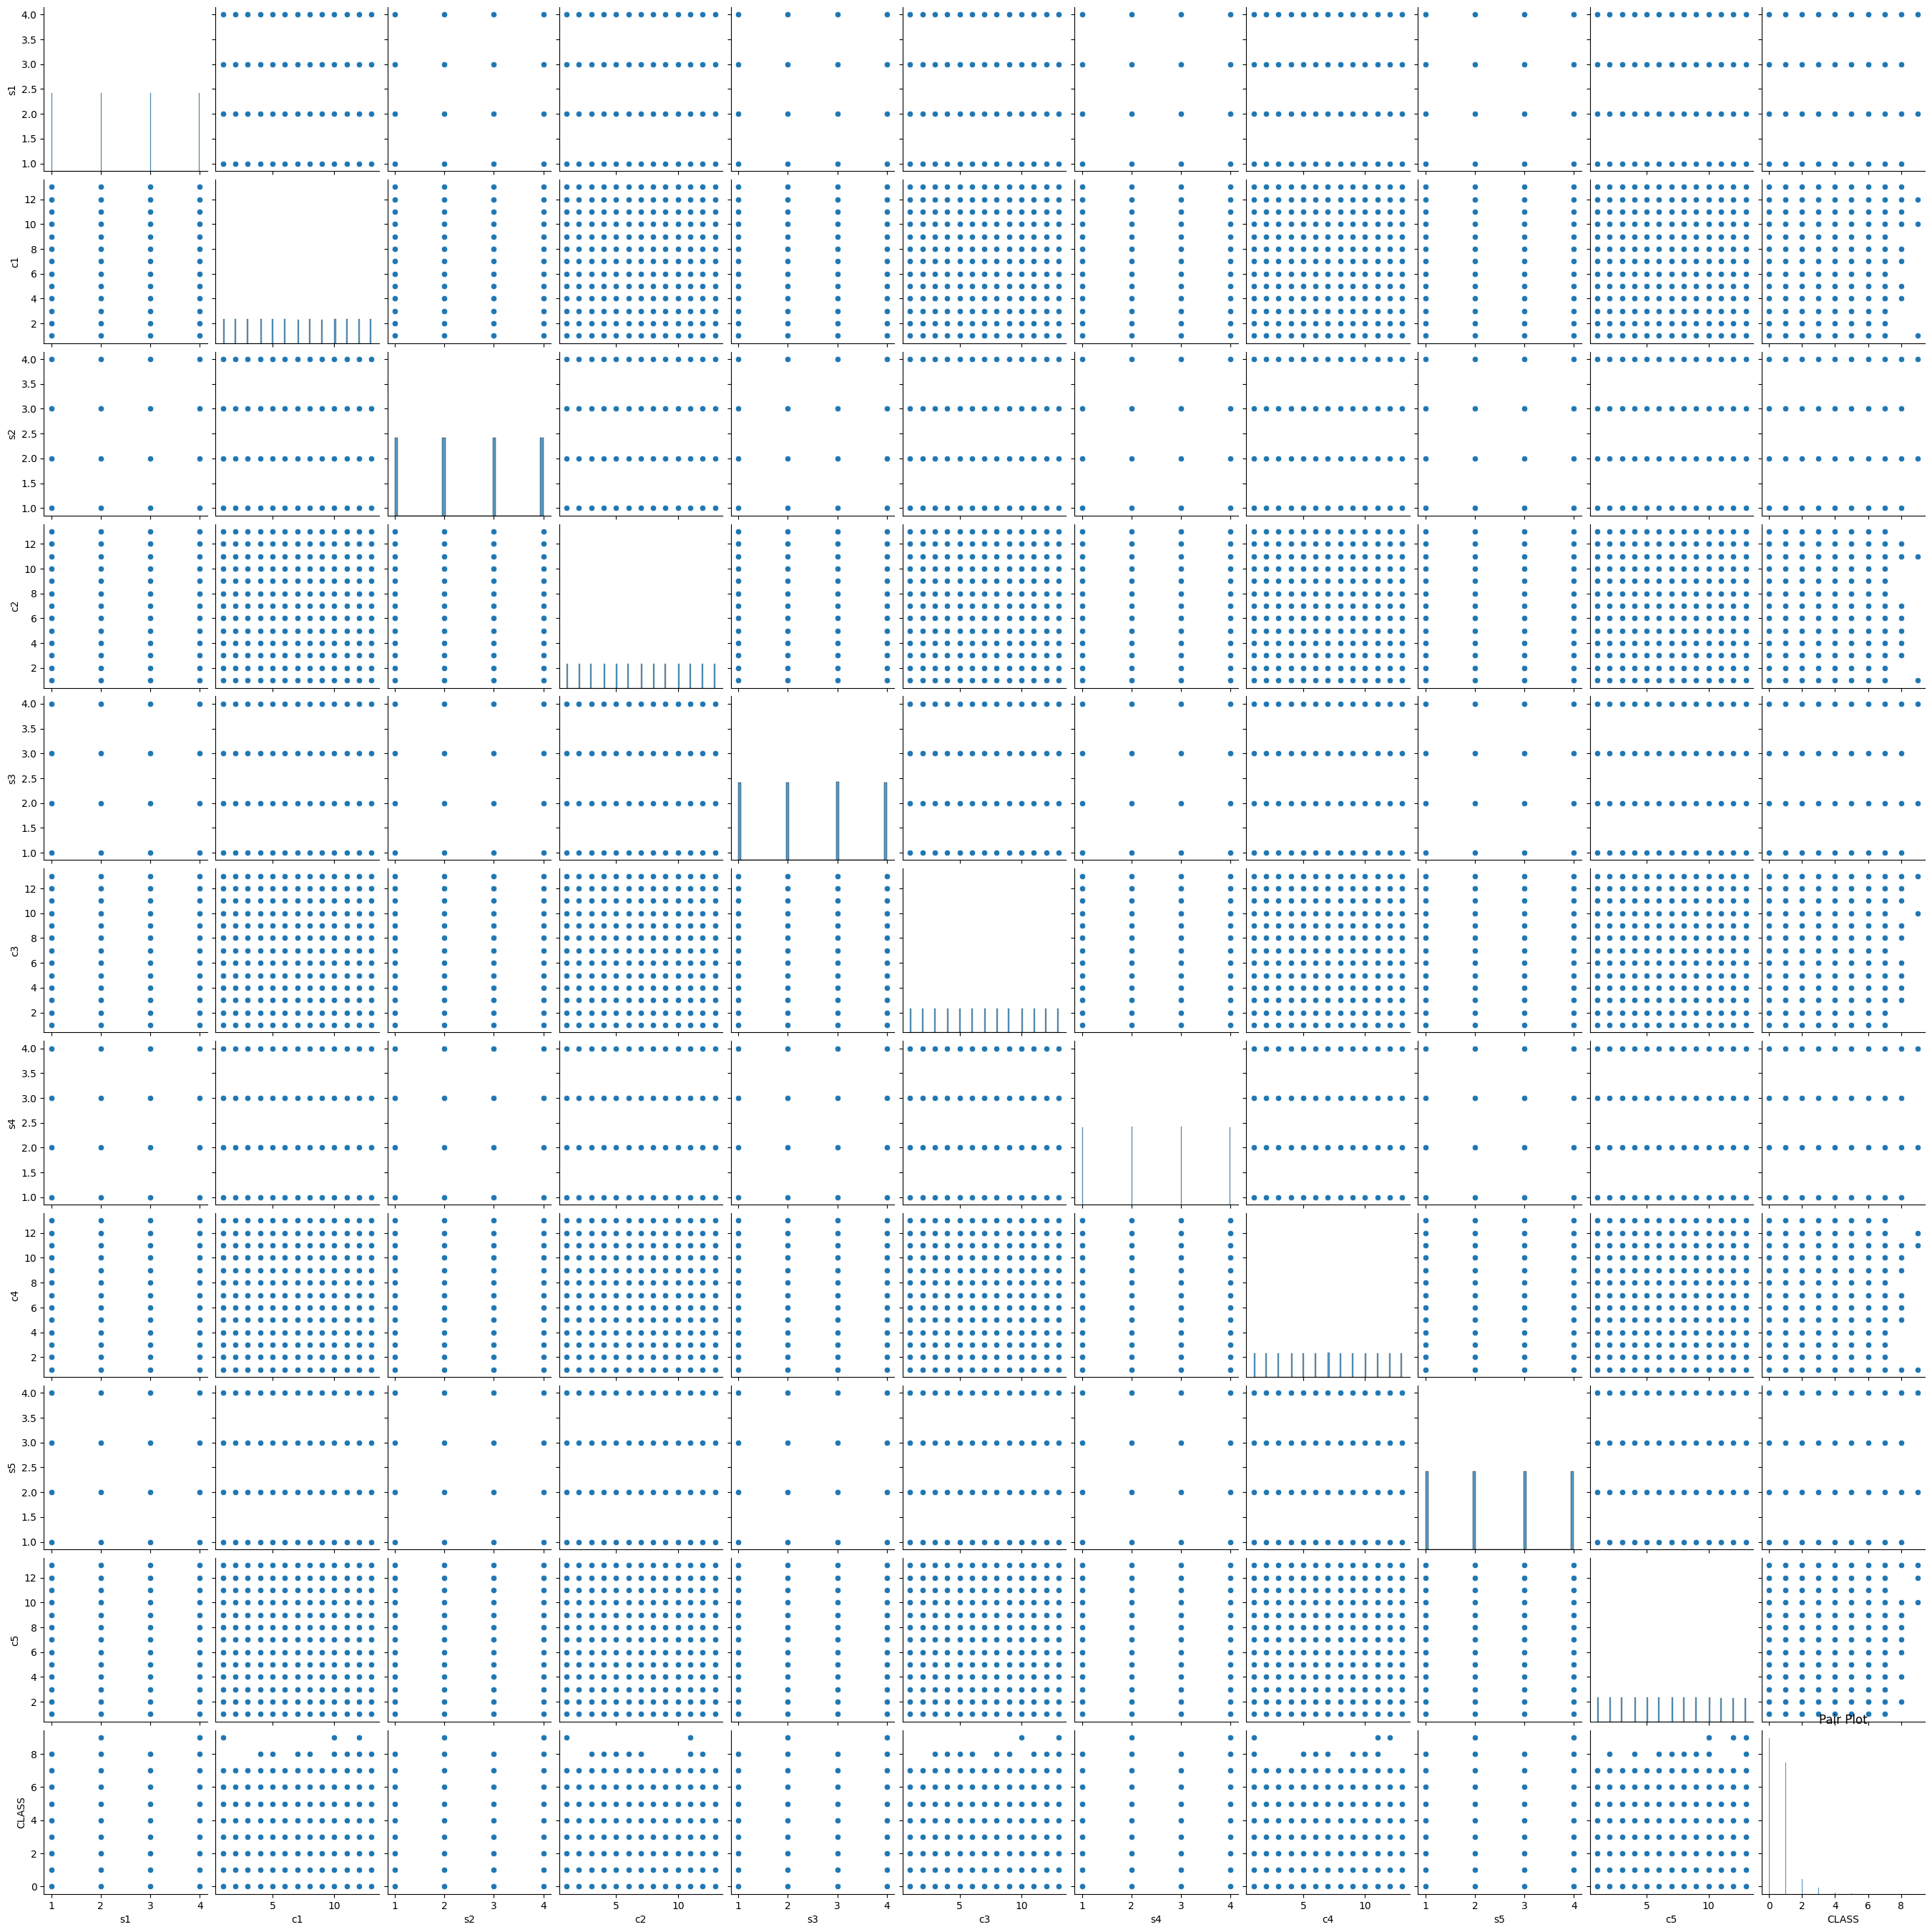

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_df is your DataFrame containing the data

# Plot pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(data)
plt.title('Pair Plot')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
dt_train_result=decision_tree.predict(xtrain)
dt_test_result=decision_tree.predict(xtest)
print("Training Accuracy: ",accuracy_score(dt_train_result,ytrain))
print("Testing Accuracy: ",accuracy_score(dt_test_result,ytest))
accuracy_dt = accuracy_score(dt_test_result,ytest)

Training Accuracy:  1.0
Testing Accuracy:  0.655736


In [ ]:
from sklearn.metrics import f1_score
# from sklearn.metrics import f1_score
multi_class_f1_score_dt_macro = f1_score(ytest, dt_test_result, average='macro')
multi_class_f1_score_dt_weighted = f1_score(ytest, dt_test_result, average='weighted')
multi_class_f1_score_dt_micro = f1_score(ytest, dt_test_result, average='micro')

print("Multi-class F1-score dt(Macro):", multi_class_f1_score_dt_macro)
print("Multi-class F1-score dt(Weighted):", multi_class_f1_score_dt_weighted)
print("Multi-class F1-score dt(Micro):", multi_class_f1_score_dt_micro)

Multi-class F1-score dt(Macro): 0.33116978232053135
Multi-class F1-score dt(Weighted): 0.6578141410260415
Multi-class F1-score dt(Micro): 0.655736


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
knn_train_result=knn.predict(xtrain)
knn_test_result=knn.predict(xtest)
print("Training Accuracy: ",accuracy_score(knn_train_result,ytrain))
print("Testing Accuracy: ",accuracy_score(knn_test_result,ytest))
accuracy_knn = accuracy_score(knn_test_result,ytest)

Training Accuracy:  0.7475066666666667
Testing Accuracy:  0.61712


In [ ]:
from sklearn.metrics import f1_score
# from sklearn.metrics import f1_score
multi_class_f1_score_knn_macro = f1_score(ytest, knn_test_result, average='macro')
multi_class_f1_score_knn_weighted = f1_score(ytest, knn_test_result, average='weighted')
multi_class_f1_score_knn_micro = f1_score(ytest, knn_test_result, average='micro')

print("Multi-class F1-score knn(Macro):", multi_class_f1_score_knn_macro)
print("Multi-class F1-score knn(Weighted):", multi_class_f1_score_knn_weighted)
print("Multi-class F1-score knn(Micro):", multi_class_f1_score_knn_micro)

Multi-class F1-score knn(Macro): 0.17083719855143012
Multi-class F1-score knn(Weighted): 0.5974112636475005
Multi-class F1-score knn(Micro): 0.61712


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
NB_train_result=naive_bayes.predict(xtrain)
NB_test_result=naive_bayes.predict(xtest)
print("Training Accuracy: ",accuracy_score(NB_train_result,ytrain))
print("Testing Accuracy: ",accuracy_score(NB_test_result,ytest))
accuracy_nb=accuracy_score(NB_test_result,ytest)

Training Accuracy:  0.5009573333333334
Testing Accuracy:  0.501964


In [ ]:
from sklearn.metrics import f1_score
# from sklearn.metrics import f1_score
multi_class_f1_score_NB_macro = f1_score(ytest, NB_test_result, average='macro')
multi_class_f1_score_NB_weighted = f1_score(ytest, NB_test_result, average='weighted')
multi_class_f1_score_NB_micro = f1_score(ytest,NB_test_result , average='micro')
print("Multi-class F1-score NB(Macro):", multi_class_f1_score_NB_macro)
print("Multi-class F1-score NB(Weighted):", multi_class_f1_score_NB_weighted)
print("Multi-class F1-score NB(Micro):", multi_class_f1_score_NB_micro)

Multi-class F1-score NB(Macro): 0.07426779573648606
Multi-class F1-score NB(Weighted): 0.3355178383716254
Multi-class F1-score NB(Micro): 0.501964


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(xtrain, ytrain)

AdaBoostClassifier()

In [ ]:
adaboost_train_result = adaboost.predict(xtrain)
adaboost_test_result = adaboost.predict(xtest)

train_accuracy = accuracy_score(ytrain, adaboost_train_result)
test_accuracy = accuracy_score(ytest, adaboost_test_result)

print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)
accuracy_adaboost=accuracy_score(adaboost_test_result, ytest)

Training Accuracy:  0.204212
Testing Accuracy:  0.204224


In [ ]:
multi_class_f1_score_adaboost_macro = f1_score(ytest, adaboost_test_result, average='macro')
multi_class_f1_score_adaboost_weighted = f1_score(ytest, adaboost_test_result, average='weighted')
multi_class_f1_score_adaboost_micro = f1_score(ytest, adaboost_test_result, average='micro')

print("Multi-class F1-score AdaBoost (Macro):", multi_class_f1_score_adaboost_macro)
print("Multi-class F1-score AdaBoost (Weighted):", multi_class_f1_score_adaboost_weighted)
print("Multi-class F1-score AdaBoost (Micro):", multi_class_f1_score_adaboost_micro)


Multi-class F1-score AdaBoost (Macro): 0.053599442687220986
Multi-class F1-score AdaBoost (Weighted): 0.25679131488049944
Multi-class F1-score AdaBoost (Micro): 0.204224


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
random_train_result = random_forest.predict(xtrain)
random_test_result = random_forest.predict(xtest)
print("Training Accuracy: ",accuracy_score(random_train_result,ytrain))
print("Testing Accuracy: ",accuracy_score(random_test_result,ytest))
accuracy_rf=accuracy_score(random_test_result,ytest)

Training Accuracy:  1.0
Testing Accuracy:  0.750196


In [ ]:
from sklearn.metrics import f1_score
# from sklearn.metrics import f1_score
multi_class_f1_score_RFC_macro = f1_score(ytest, random_test_result, average='macro')
multi_class_f1_score_RFC_weighted = f1_score(ytest, random_test_result, average='weighted')
multi_class_f1_score_RFC_micro = f1_score(ytest, random_test_result, average='micro')

print("Multi-class F1-score RFC(Macro):", multi_class_f1_score_RFC_macro)
print("Multi-class F1-score RFC(Weighted):", multi_class_f1_score_RFC_weighted)
print("Multi-class F1-score RFC(Micro):", multi_class_f1_score_RFC_micro)

Multi-class F1-score RFC(Macro): 0.23485508443371847
Multi-class F1-score RFC(Weighted): 0.7224367601527473
Multi-class F1-score RFC(Micro): 0.750196


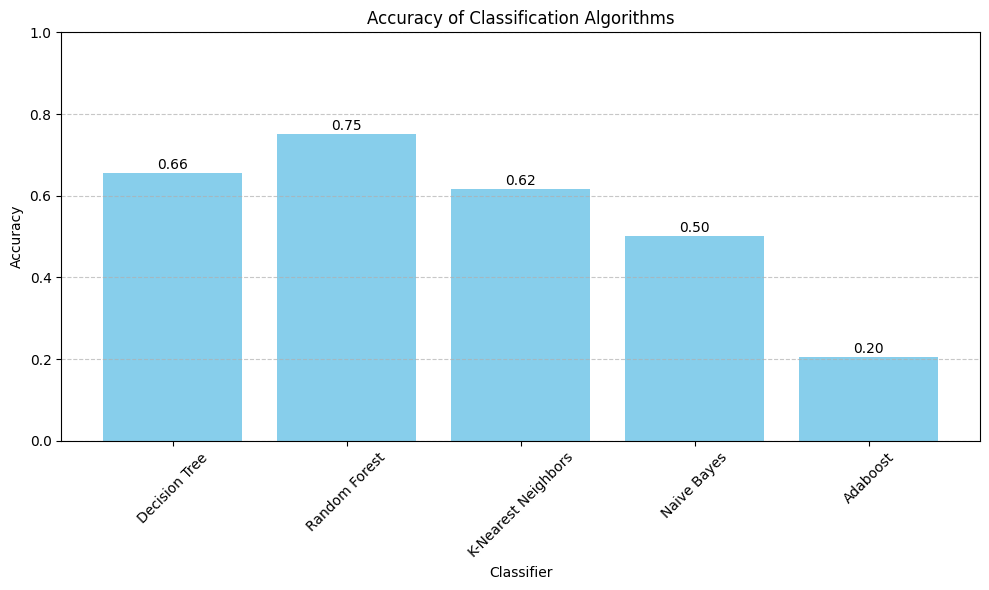

In [ ]:
import matplotlib.pyplot as plt

# List of classifiers and their accuracies
classifiers = ["Decision Tree", "Random Forest", "K-Nearest Neighbors", "Naive Bayes", "Adaboost"]
accuracies = [accuracy_dt, accuracy_rf, accuracy_knn, accuracy_nb, accuracy_adaboost]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='skyblue')
plt.title('Accuracy of Classification Algorithms')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add value labels on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.show()


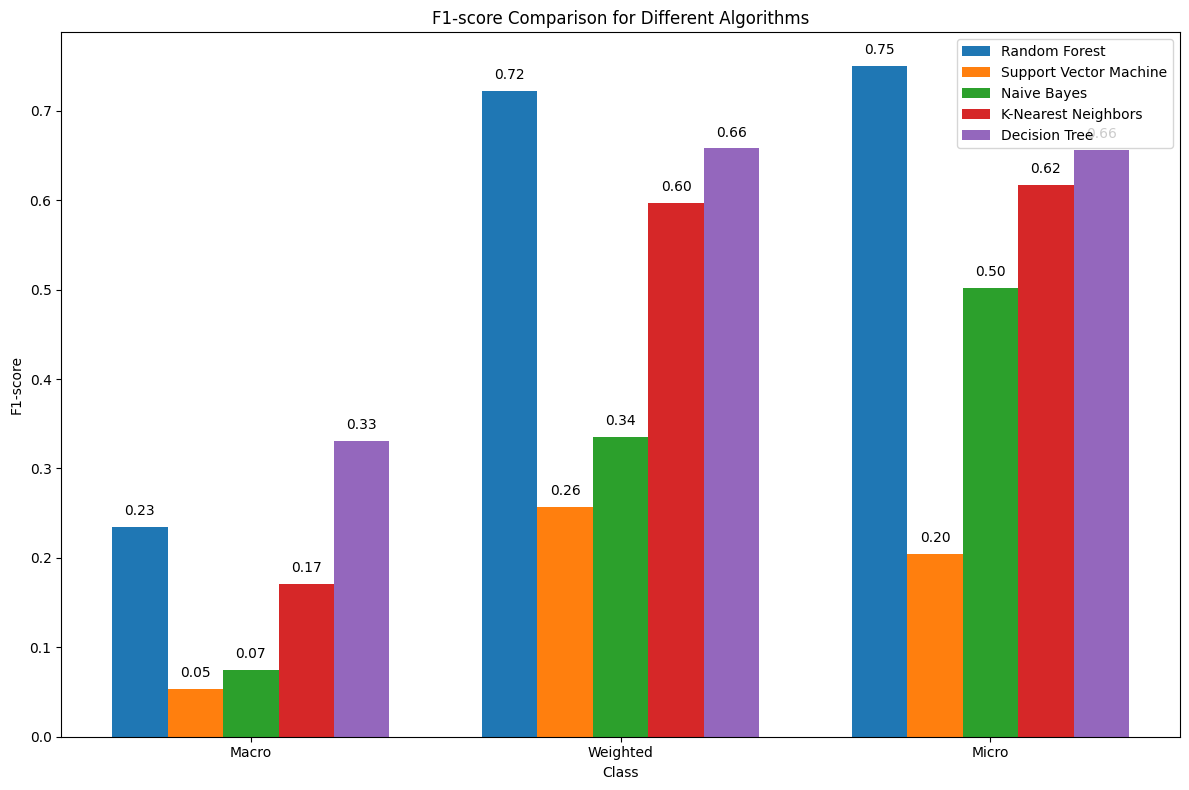

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

f1_scores_dict = {
    'Random Forest': [multi_class_f1_score_RFC_macro, multi_class_f1_score_RFC_weighted, multi_class_f1_score_RFC_micro],
    'Support Vector Machine': [multi_class_f1_score_adaboost_macro, multi_class_f1_score_adaboost_weighted, multi_class_f1_score_adaboost_micro],
    'Naive Bayes': [multi_class_f1_score_NB_macro, multi_class_f1_score_NB_weighted, multi_class_f1_score_NB_micro],
    'K-Nearest Neighbors': [multi_class_f1_score_knn_macro, multi_class_f1_score_knn_weighted, multi_class_f1_score_knn_micro],
    'Decision Tree': [multi_class_f1_score_dt_macro, multi_class_f1_score_dt_weighted, multi_class_f1_score_dt_micro]
}

# Get class names and number of algorithms
class_names = ['Macro', 'Weighted', 'Micro']
num_algorithms = len(f1_scores_dict)

# Set width for each group of bars
bar_width = 0.15

# Set positions for each group of bars
bar_positions = np.arange(len(class_names))

# Set offset for each algorithm's bars within a group
offsets = np.linspace(-0.3, 0.3, num_algorithms)

# Plot grouped bar chart
plt.figure(figsize=(12, 8))

for i, (algorithm, f1_scores) in enumerate(f1_scores_dict.items()):
    plt.bar(bar_positions + offsets[i], f1_scores, width=bar_width, label=algorithm)
    # Add text annotations
    for j, score in enumerate(f1_scores):
        plt.text(bar_positions[j] + offsets[i], score + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('F1-score Comparison for Different Algorithms')
plt.xticks(bar_positions, class_names)  # Use class names instead of class indices
plt.legend()
plt.tight_layout()
plt.show()


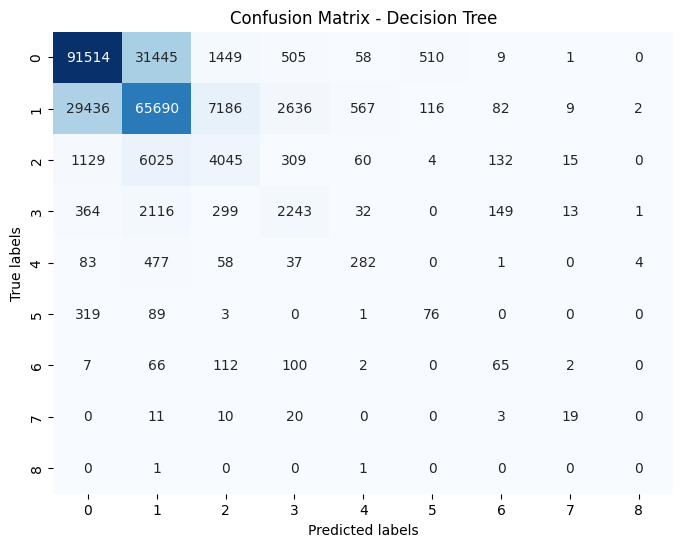

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the true and predicted labels respectively for each algorithm

# Function to plot confusion matrix
def plot_confusion_matrix(ytrain, ytest, title):
    cm = confusion_matrix(ytrain, ytest)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Decision Tree
plot_confusion_matrix(ytest, dt_test_result, 'Confusion Matrix - Decision Tree')


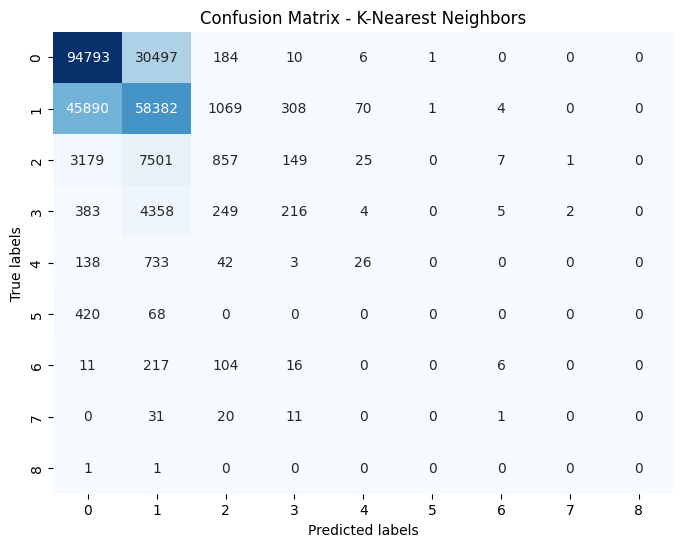

In [ ]:
# # K-Nearest Neighbors
plot_confusion_matrix(ytest, knn_test_result, 'Confusion Matrix - K-Nearest Neighbors')

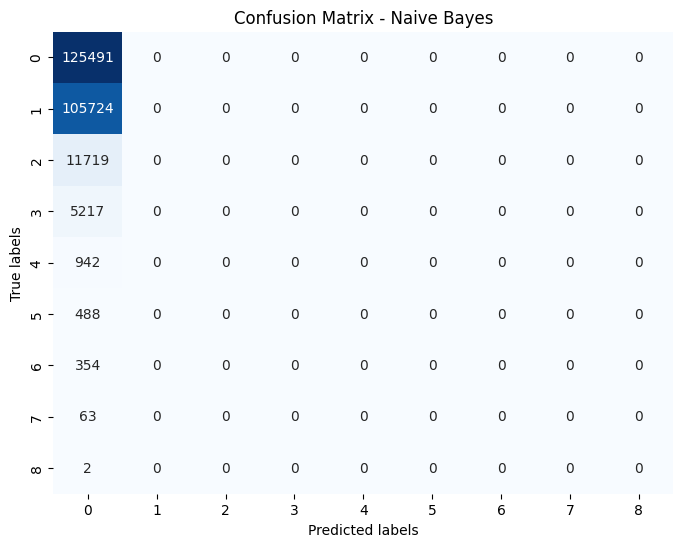

In [ ]:
# # Naive Bayes
plot_confusion_matrix(ytest, NB_test_result, 'Confusion Matrix - Naive Bayes')

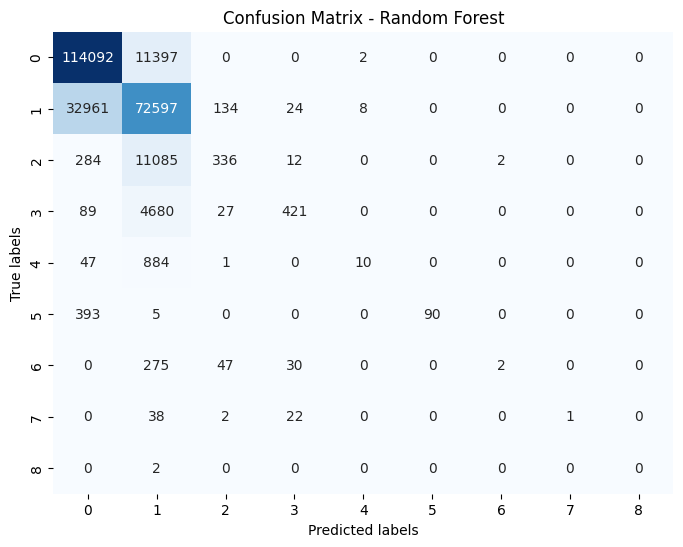

In [ ]:
# # Random Forest
plot_confusion_matrix(ytest, random_test_result, 'Confusion Matrix - Random Forest')

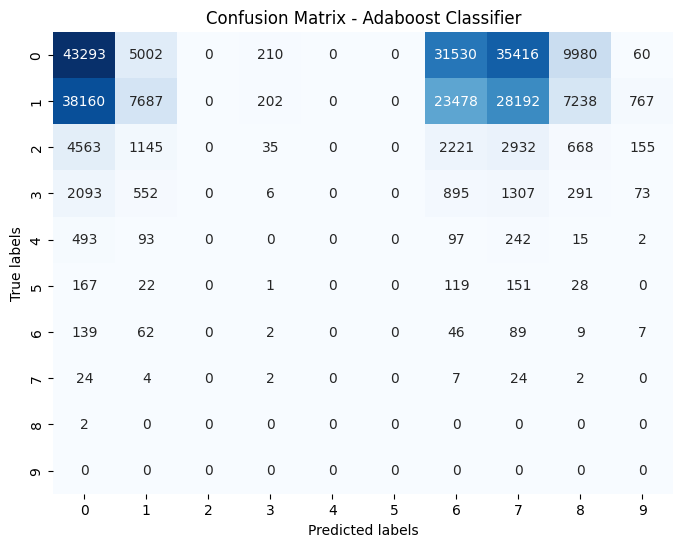

In [ ]:
# # AdaBoost Classifier
plot_confusion_matrix(ytest, adaboost_test_result, 'Confusion Matrix - Adaboost Classifier')